In [ ]:
https://zenodo.org/records/7221150/files/LAGT_v2-0.json?download=1

# Requirements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%%time
# s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")
#LAGT = s.read_file("SDAM_data/LAGT/LAGT_lemmatized_20201119.json", "df")
LAGT = pd.read_json("../data/large_files/LAGT_v2-0.json")

CPU times: user 4.49 s, sys: 1.47 s, total: 5.96 s
Wall time: 6.84 s


In [3]:
LAGT.head(5)

,filename,author,title,wordcount,author_id,doc_id,raw_date,date_avr,date_probs,date_manual,provenience,tlg_epithet,clean_string,n_sentences,lemmatized_sentences,GLAUx?
0,tlg0001.tlg001.perseus-grc2.xml,Apollonius Rhodius,Argonautica,38822,tlg0001,tlg0001.tlg001,3 B.C.,-2.5,{'-2.5': 1},-2.5,pagan,Epici/-ae,"ἀρχόμενος σέο, Φοῖβε, παλαιγενέων κλέα φωτῶν μ...",3252,"[[ἄρχω, Φοῖβος, παλαιγενής, κλέος, φώς, μιμνῄσ...",True
1,tlg0003.tlg001.perseus-grc2.xml,Thucydides,The Peloponnesian War,150118,tlg0003,tlg0003.tlg001,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Historici/-ae,Θουκυδίδης Ἀθηναῖος ξυνέγραψε τὸν πόλεμον τῶν...,6068,"[[Θουκυδίδης, Ἀθηναῖος, συγγράφω, πόλεμος, Πελ...",True
2,tlg0004.tlg001.perseus-grc1.xml,Diogenes Laertius,Lives of Eminent Philosophers,110763,tlg0004,tlg0004.tlg001,A.D. 3,2.5,{'2.5': 1},NaN,,Biographi,Τὸ τῆς φιλοσοφίας ἔργον ἔνιοί φασιν ἀπὸ βαρβάρ...,10245,"[[φιλοσοφία, ἔργον, ἔνιοι, φημί, βάρβαρος, ἄρχ...",False
3,tlg0005.tlg001.perseus-grc1.xml,Theocritus,Idylls,19200,tlg0005,tlg0005.tlg001,4-3 B.C.,-3.0,"{'-3.5': 0.5, '-2.5': 0.5}",NaN,,Bucolici,"̔Αδύ τι τὸ ψιθύρισμα καὶ ἁ πίτυς αἰπόλε τήνα,...",1982,"[[ἡδύς, τις, ψιθύρισμα, πίτυς, αἰπόλος, ἐκεῖνο...",True
4,tlg0005.tlg002.perseus-grc1.xml,Theocritus,Epigrams,1734,tlg0005,tlg0005.tlg002,4-3 B.C.,-3.0,"{'-3.5': 0.5, '-2.5': 0.5}",NaN,,Bucolici,τὰ ῥόδα τὰ δροσόεντα καὶ ἁ κατάπυκνος ἐκείνα ἕ...,152,"[[ῥόδον, δροσόεις, κατάπυκνος, ἐκεῖνος, ἕρπυλλ...",True


In [4]:
LAGT.drop(columns=["clean_string", "lemmatized_sentences"]).to_json("../data/LAGT_2-0_metadata.json")

# Export latest data for improvement...

In [5]:
LAGT.columns

Index(['filename', 'author', 'title', 'wordcount', 'author_id', 'doc_id',
       'raw_date', 'date_avr', 'date_probs', 'date_manual', 'provenience',
       'tlg_epithet', 'clean_string', 'n_sentences', 'lemmatized_sentences',
       'GLAUx?'],
      dtype='object')

# A preliminary overview

In [6]:
len(LAGT)

1457

In [7]:
### total number of words
LAGT["wordcount"].sum() # 33419267

31248866

In [8]:
len(LAGT[LAGT["date_avr"].notnull()])

1359

In [9]:
# number of documents before the end of the 4th c. CE
len(LAGT[LAGT["date_avr"].notnull()][LAGT["date_avr"] < 4])

1255

# Comparing different approaches to dating

In [10]:
LAGT.head(5)

,filename,author,title,wordcount,author_id,doc_id,raw_date,date_avr,date_probs,date_manual,provenience,tlg_epithet,clean_string,n_sentences,lemmatized_sentences,GLAUx?
0,tlg0001.tlg001.perseus-grc2.xml,Apollonius Rhodius,Argonautica,38822,tlg0001,tlg0001.tlg001,3 B.C.,-2.5,{'-2.5': 1},-2.5,pagan,Epici/-ae,"ἀρχόμενος σέο, Φοῖβε, παλαιγενέων κλέα φωτῶν μ...",3252,"[[ἄρχω, Φοῖβος, παλαιγενής, κλέος, φώς, μιμνῄσ...",True
1,tlg0003.tlg001.perseus-grc2.xml,Thucydides,The Peloponnesian War,150118,tlg0003,tlg0003.tlg001,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Historici/-ae,Θουκυδίδης Ἀθηναῖος ξυνέγραψε τὸν πόλεμον τῶν...,6068,"[[Θουκυδίδης, Ἀθηναῖος, συγγράφω, πόλεμος, Πελ...",True
2,tlg0004.tlg001.perseus-grc1.xml,Diogenes Laertius,Lives of Eminent Philosophers,110763,tlg0004,tlg0004.tlg001,A.D. 3,2.5,{'2.5': 1},NaN,,Biographi,Τὸ τῆς φιλοσοφίας ἔργον ἔνιοί φασιν ἀπὸ βαρβάρ...,10245,"[[φιλοσοφία, ἔργον, ἔνιοι, φημί, βάρβαρος, ἄρχ...",False
3,tlg0005.tlg001.perseus-grc1.xml,Theocritus,Idylls,19200,tlg0005,tlg0005.tlg001,4-3 B.C.,-3.0,"{'-3.5': 0.5, '-2.5': 0.5}",NaN,,Bucolici,"̔Αδύ τι τὸ ψιθύρισμα καὶ ἁ πίτυς αἰπόλε τήνα,...",1982,"[[ἡδύς, τις, ψιθύρισμα, πίτυς, αἰπόλος, ἐκεῖνο...",True
4,tlg0005.tlg002.perseus-grc1.xml,Theocritus,Epigrams,1734,tlg0005,tlg0005.tlg002,4-3 B.C.,-3.0,"{'-3.5': 0.5, '-2.5': 0.5}",NaN,,Bucolici,τὰ ῥόδα τὰ δροσόεντα καὶ ἁ κατάπυκνος ἐκείνα ἕ...,152,"[[ῥόδον, δροσόεις, κατάπυκνος, ἐκεῖνος, ἕρπυλλ...",True


In [11]:
centuries = [num + 0.5 for num in range(-8, 4)]
centuries

[-7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]

In [12]:
dates = [num /10 for num in range(-75, 40, 5)]
print(dates)

[-7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]


In [13]:
LAGT["date_probs"].tolist()[0]["-2.5"]

1

In [14]:
centuries_aor = {}
def get_prob(x):
    try: return x[str(century)]
    except: return 0
for century in centuries:
    centuries_aor[century] =  LAGT["date_probs"].apply(get_prob).sum()
centuries_aor

{-7.5: 6.8331,
 -6.5: 3.8331000000000004,
 -5.5: 9.8331,
 -4.5: 139.0,
 -3.5: 234.0001,
 -2.5: 42.2501,
 -1.5: 12.9586,
 -0.5: 40.8964,
 0.5: 168.3657,
 1.5: 450.1011,
 2.5: 77.97030000000001,
 3.5: 68.9081}

In [15]:
centuries_aor_df = pd.DataFrame(centuries_aor, index=[0]).T[:6]
centuries_aor_df

,0
-7.5,6.8331
-6.5,3.8331
-5.5,9.8331
-4.5,139.0000
-3.5,234.0001
-2.5,42.2501
-1.5,12.9586
-0.5,40.8964
0.5,168.3657
1.5,450.1011


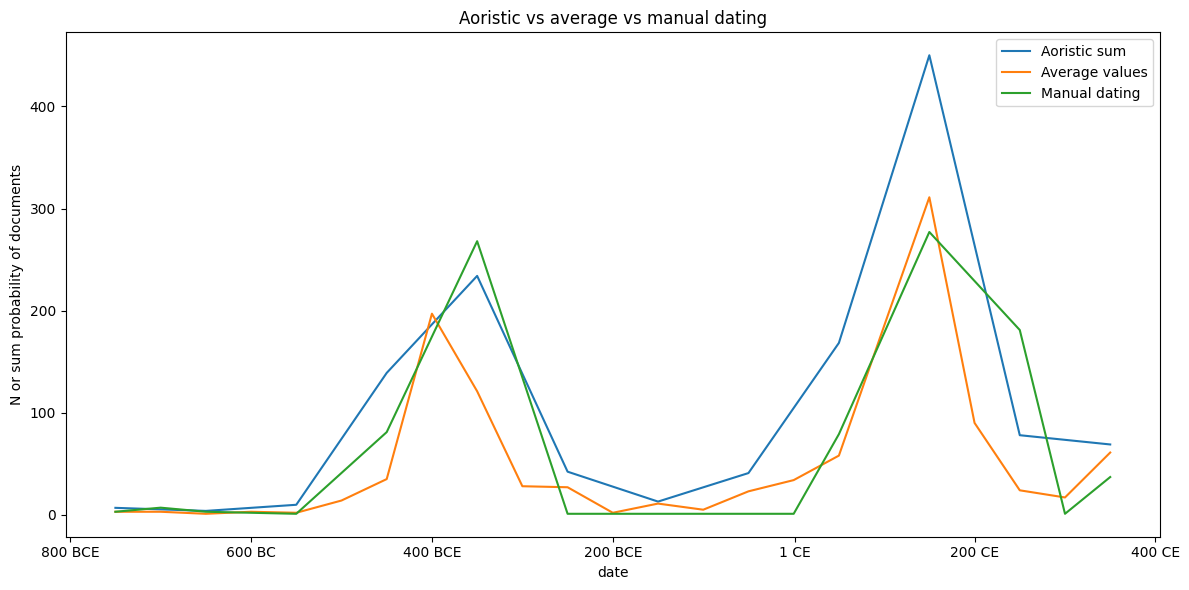

In [16]:
### documents with probabilities
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)

centuries_aor_df.plot(ax=ax)
LAGT.groupby("date_avr").size()[:3.5].plot(ax=ax)
LAGT.groupby("date_manual").size()[:3.5].plot(ax=ax)
ax.set_xlabel("date")
ax.set_ylabel("N or sum probability of documents")
ax.set_xticks([-8, -6, -4, -2, 0.01, 2, 4])
ax.set_xticklabels(["800 BCE", "600 BC", "400 BCE", "200 BCE", "1 CE", "200 CE", "400 CE"])

plt.title("Aoristic vs average vs manual dating")
plt.legend(labels=["Aoristic sum", "Average values", "Manual dating"])

In [17]:
# s.write_file("SDAM_data/LAGT/LAGT_dating_overview_20231019.png", fig)

# Overview of authors

In [18]:
authors = []
for author_id in LAGT["author_id"].unique().tolist():
  author_df = LAGT[LAGT["author_id"]==author_id]
  try: author = "/".join(author_df["author"].unique().tolist())
  except: author = author_df["author"].unique().tolist()[0]
  wordcount = author_df["wordcount"].sum()
  provenience = author_df["provenience"].unique().tolist()[0]
  date = author_df["date_avr"].unique().tolist()[0]
  author_data = [author_id, author, provenience, date, len(author_df), wordcount]
  authors.append(author_data)

In [19]:
authors_df = pd.DataFrame(authors)
authors_df.columns = ["author id", "name", "provenience", "date", "N of works", "N of words"]
authors_df.head(5)

,author id,name,provenience,date,N of works,N of words
0,tlg0001,Apollonius Rhodius,pagan,-2.5,1,38822
1,tlg0003,Thucydides,pagan,-4.5,1,150118
2,tlg0004,Diogenes Laertius,,2.5,1,110763
3,tlg0005,Theocritus,,-3.0,3,21011
4,tlg0006,Euripides,pagan,-4.5,17,134129


In [20]:
len(authors_df)

274

In [21]:
# set_with_dataframe(LAGT_overview.add_worksheet("authors_overview_20201027", rows=1, cols=1), authors_df)

# Wordcounts overview

In [22]:
dates

[-7.5,
 -7.0,
 -6.5,
 -6.0,
 -5.5,
 -5.0,
 -4.5,
 -4.0,
 -3.5,
 -3.0,
 -2.5,
 -2.0,
 -1.5,
 -1.0,
 -0.5,
 0.0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5]

In [23]:
def date_avr_to_string(date):
    if str(date)[-1]=="5":
        date_number = str(int(abs(date) + 0.5))
       
    else: 
        if date < 0:
            date_number = str(int(abs(date) + 1))  + "/" + str(int(abs(date)))
        else: 
            date_number = str(int(abs(date)))  + "/" + str(int(abs(date) + 1))
    if date < 0: date_string = date_number + " BCE"
    else: date_string = date_number + " CE"
    if date == 0.0:
        date_string = "1 BCE/1 CE"
    return date_string

In [24]:
subselections = []
for date in dates:
    subselection = LAGT[LAGT["date_avr"]== date]
    wordcount_christian = LAGT[(LAGT["date_avr"]== date) & (LAGT["provenience"]=="christian")]["wordcount"].sum()
    wordcount_pagan = LAGT[(LAGT["date_avr"]== date) & (LAGT["provenience"]!="christian")]["wordcount"].sum()
    wordcount = subselection["wordcount"].sum()
    sentences = subselection["lemmatized_sentences"].apply(lambda x: len(x)).sum()
    doccount = len(subselection)
    date_string = date_avr_to_string(date)
    subselection_dict = {"date_string" : date_string, "column" : "date_avr", "value" : date, "wordcount" : wordcount, "sentences" : sentences, "wordcount_christian" : wordcount_christian, "wordcount_pagan" : wordcount_pagan, "doccount": doccount}
    subselections.append(subselection_dict)
subselections_df = pd.DataFrame(subselections)
subselections_df

,date_string,column,value,wordcount,sentences,wordcount_christian,wordcount_pagan,doccount
0,8 BCE,date_avr,-7.5,199822,15138,0,199822,3
1,8/7 BCE,date_avr,-7.0,16193,1182,0,16193,3
2,7 BCE,date_avr,-6.5,144,13,0,144,1
3,7/6 BCE,date_avr,-6.0,9268,689,0,9268,3
4,6 BCE,date_avr,-5.5,39711,3391,0,39711,2
5,6/5 BCE,date_avr,-5.0,66272,6074,0,66272,14
6,5 BCE,date_avr,-4.5,558265,38205,0,558265,35
7,5/4 BCE,date_avr,-4.0,1557973,106974,0,1557973,197
8,4 BCE,date_avr,-3.5,1278461,76492,0,1278461,121
9,4/3 BCE,date_avr,-3.0,207682,22133,0,207682,28


Text(0.5, 1.0, 'Corpus overview')

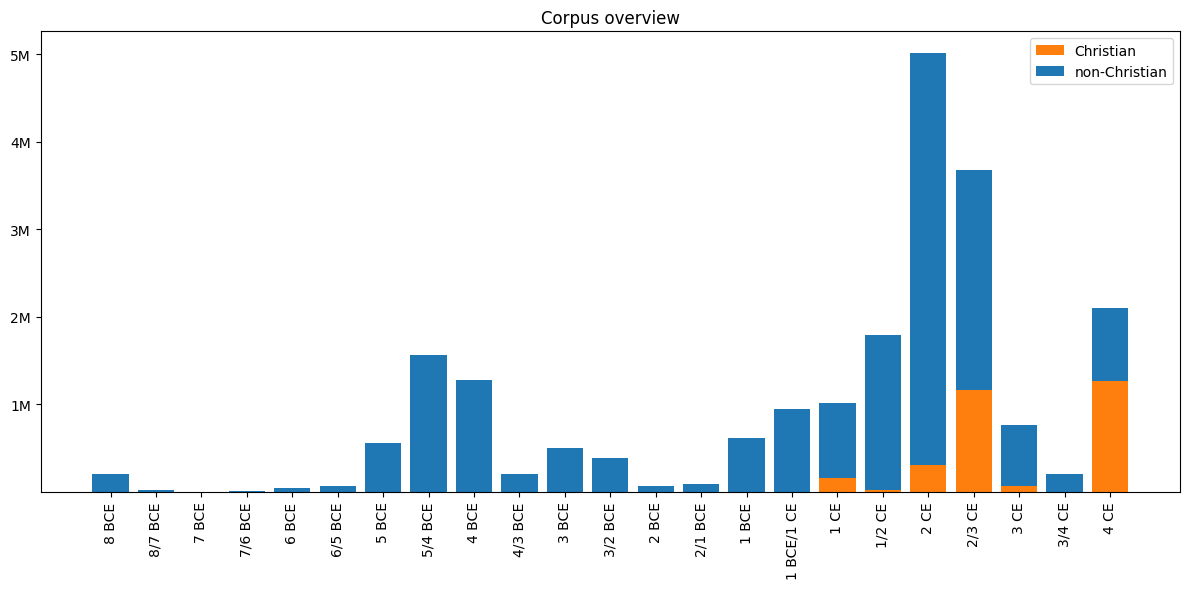

In [25]:
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
#subselections_df = subselections_df.iloc[::-1]
ax.bar(subselections_df["date_string"], subselections_df["wordcount_christian"], color="tab:orange", label="Christian")
ax.bar(subselections_df["date_string"], subselections_df["wordcount_pagan"], bottom=subselections_df["wordcount_christian"], label="non-Christian", color="tab:blue")

ax.set_yticks(range(1000000,6000000, 1000000))
ax.set_yticklabels(str(n) + "M" for n in range(1,6))
ax.set_xticklabels(subselections_df["date_string"], rotation=90)
ax.legend()
plt.title("Corpus overview")

In [27]:
fig.savefig("../figures/LAGT-2-0_words-overview.png")

In [28]:
subcorpora_dict = {# main subcorpora
    "Archaic (8-6 BCE)" : LAGT[(LAGT["provenience"]=="pagan") & (LAGT["date_avr"] <= -5.5)],
    "Classical (5-4 BCE)" : LAGT[(LAGT["provenience"]=="pagan") & (LAGT["date_avr"].between(-5, -3))],
    "Non-Christian (1-4 CE)" : LAGT[(LAGT["date_avr"].between(0, 4)) & (LAGT["provenience"]=="pagan")],
    "Christian (1-4 CE)" : LAGT[(LAGT["date_avr"] < 4) & (LAGT["provenience"]=="christian")]}
   
subcorpora_dict_other = {
    # other relevant subcorpora (some overlaps)
    "Pagan (8th c. BCE - 4th c. CE)" : LAGT[(LAGT["provenience"]=="pagan") & (LAGT["date_avr"] < 4)],
    "Pagan (1st - 4th c. CE)" : LAGT[(LAGT["date_avr"].between(0, 4)) & (LAGT["provenience"]=="pagan")],
    "Septuagint" : LAGT[LAGT["author_id"]=="tlg0527"],
    "Philo of Alexandria" : LAGT[LAGT["author_id"]=="tlg0018"],
    "Titus Flavius Josephus" : LAGT[LAGT["author_id"]=="tlg0526"],
    "Paul of Tarsus" : LAGT[LAGT["author_id"]=="tlg0031paul"],
    "New Testament" : LAGT[LAGT["author_id"].str.startswith("tlg0031")],
    "Christian (1st - 4th c. CE)" : LAGT[(LAGT["date_avr"] < 4) & (LAGT["provenience"]=="christian")]}

In [29]:
subselections = []
for key in subcorpora_dict.keys():
    subselection = subcorpora_dict[key]
    subselection_dict = {}
    wordcount = subselection["wordcount"].sum()
    doccount = len(subselection)
    sentences = subselection["lemmatized_sentences"].apply(lambda x: len(x)).sum()
    subselection_dict.update({"label" : key, "wordcount" : wordcount, "doccount" : doccount, "sentences" : sentences})
    subselections.append(subselection_dict)
subselections_df = pd.DataFrame(subselections)
subselections_df

,label,wordcount,doccount,sentences
0,Archaic (8-6 BCE),264919,11,20355
1,Classical (5-4 BCE),3411906,338,234904
2,Non-Christian (1-4 CE),8692448,411,690082
3,Christian (1-4 CE),2975644,131,288826


In [31]:
subselections_df.to_csv("../data/LAGT-2-0_subcorpora-overview.csv")